# Introduction Basic statistics in R 

Here, we will work with random numbers, distributions and sampling


## Installation of libraries and necessary software

Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:


In [2]:
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("cluster", repos='http://cran.us.r-project.org')


The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpkHivud/downloaded_packages

The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpkHivud/downloaded_packages


## Loading data and libraries
This requires that the installation above have been finished without error

In [ ]:
library("MASS")
library("cluster")

### Exercise 1
This exercise will help you to understand how probabilities are calculated. 

__Important:__ Take your time as several parts are tricky and quite abstract

_Probabilities_

1) Read the description of ```dnorm()```: ```help(dnorm)```  
2) Plot the density (```dnorm()```) and the cumulative (```pnorm()```) probability distribution of a normal distribution with mean 2.5 and standard deviation 1.5.  
3) Estimate the probability for getting a number between 0.5 and 4 from the figure of the cumulative distribution. Verify this number with its exact calculation ```pnorm(4, 2.5, 1.5) - pnorm(0.5, 2.5, 1.5)```  
4) Repeat the same for the intervals (-1, 2) and (1, 2)

_Frequencies_
- The relative number of observations per unit interval around $x=2$ (number ranging from 1.5 to 2.5) is given by ```dnorm(x=2, 2.5, 1.5)```. Hence
  - In a sample of 100 numbers taken from a normal distribution, the expected number of observations per unit interval in the immediate vicinity of $x=2$ is 25.16
  - In a sample of 1000 numbers, the expected number of observations per unit interval in the immediate vicinity of $x=2$ is 251.6
  - The expected number of values between 1.9 and 2.1, when having a sample taking 1000 random numbers, is approximately $0.2 \cdot 251.6 = 50.32$, or, more precisely,
```pnorm(2.1, 2.5, 1.5) - pnorm(1.9, 2.5, 1.5)```

- Repeat the calculation for the intervals (-1,2) and (1,2). 


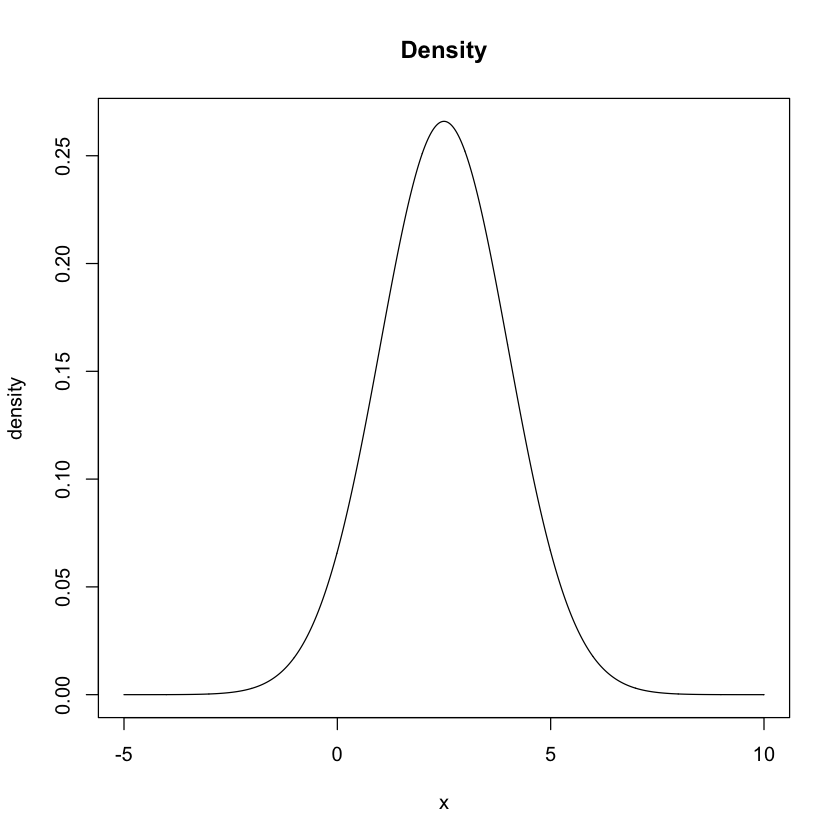

[1] "probability between 0.5 and 4 = 0.750133526342675"
[1] "probability between -1 and 2 = 0.359626011553118"
[1] "probability between 1 and 2 = 0.210786086250307"


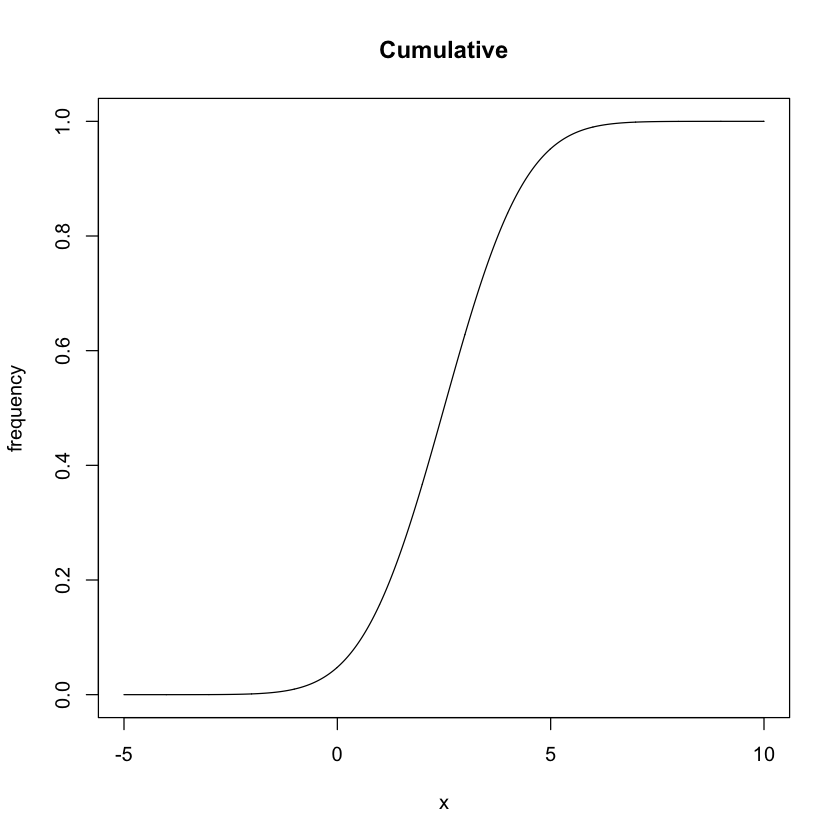

In [4]:
x <- seq(-5,10,0.01)
density <- dnorm(x, mean=2.5, sd=1.5)
cumulative <- pnorm(x, mean=2.5, sd=1.5)

## plot the functions:
plot(x, density, "l", ylab="density", main = "Density")
plot(x, cumulative,"l", ylab="frequency", main = "Cumulative")

#probability for getting a number between 0.5 and 4
p1 <- pnorm(4, 2.5, 1.5) - pnorm(0.5, 2.5, 1.5)
print(paste("probability between 0.5 and 4 =",p1))
#(-1,2)
p2 <- pnorm(2, 2.5, 1.5) - pnorm(-1, 2.5, 1.5)
print(paste("probability between -1 and 2 =",p2))
#(1,2)
p3 <- pnorm(2, 2.5, 1.5) - pnorm(1, 2.5, 1.5)
print(paste("probability between 1 and 2 =",p3))


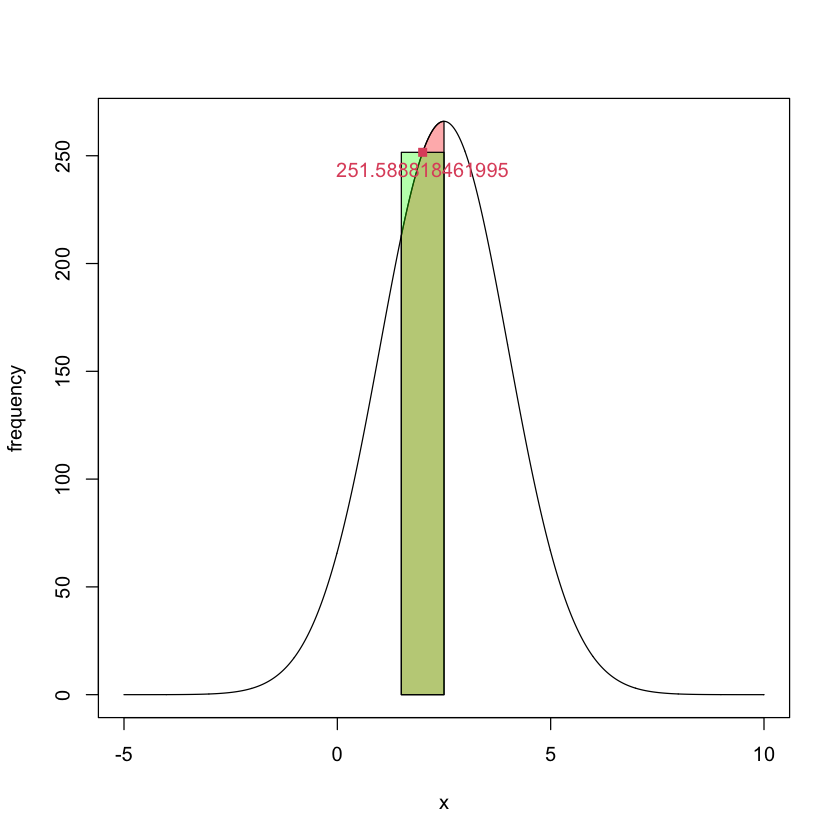

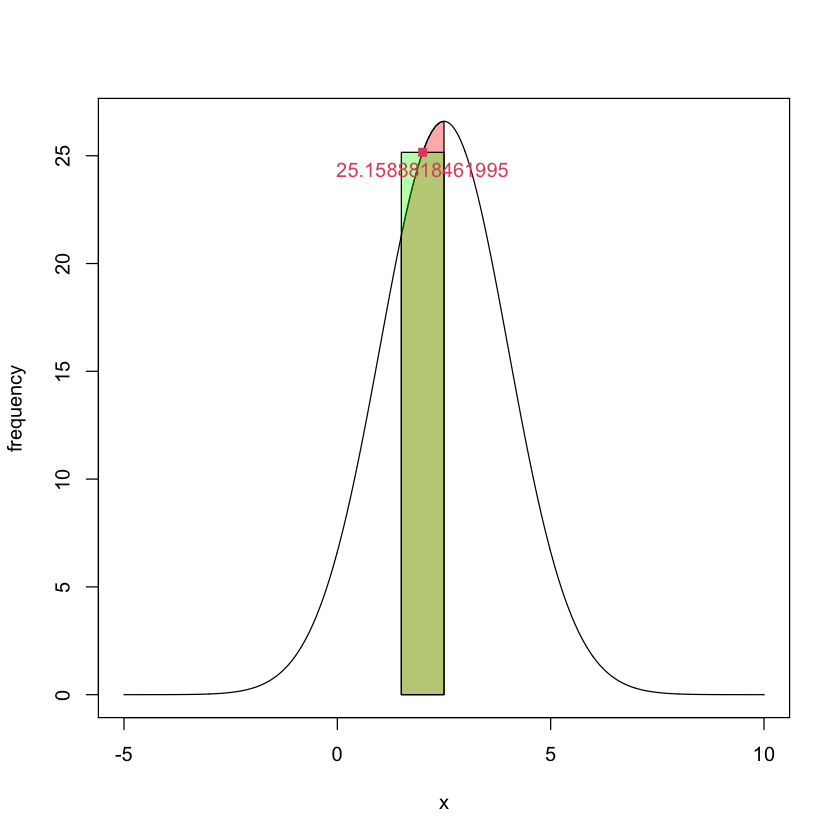

[1] 50.28465

[1] "probability between 1.9 and 2.1 = 0.0502846520743494"


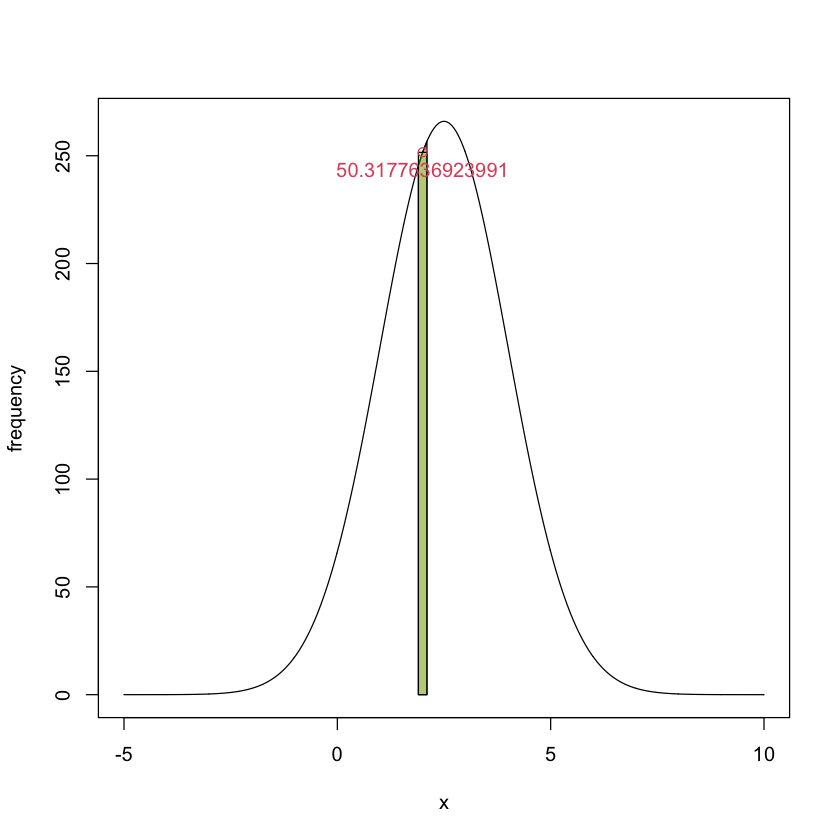

In [17]:
# This code is related to a question below and the sample with 1000 observations above
plot(x, 1000*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(1.5,2.5,0.01)
polygon(c(1.5,interval,2.5), c(0,1000*dnorm(interval, 2.5,1.5),0), col = "#FF000055")
polygon(c(1.5,2.5,2.5,1.5), 1000*c(dnorm(2, 2.5,1.5),dnorm(2, 2.5,1.5),0,0), col = "#00FF0055")
points(2,1000*dnorm(2,2.5,1.5),pch=15,col=2)
text(2,1000*dnorm(2,2.5,1.5),pch=15,col=2,labels =1000*dnorm(2,2.5,1.5), pos=1)

#the sample with 100 observations
plot(x, 100*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(1.5,2.5,0.1)
polygon(c(1.5,interval,2.5), c(0,100*dnorm(interval, 2.5,1.5),0), col = "#FF000055")
polygon(c(1.5,2.5,2.5,1.5), 100*c(dnorm(2, 2.5,1.5),dnorm(2, 2.5,1.5),0,0), col = "#00FF0055")
points(2,100*dnorm(2,2.5,1.5),pch=15,col=2)
text(2,100*dnorm(2,2.5,1.5),pch=15,col=2,labels =100*dnorm(2,2.5,1.5), pos=1)

#The expected number of values between 1.9 and 2.1, when the sample with 1000 observations
plot(x, 1000*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(1.9,2.1,0.1)
polygon(c(1.9,interval,2.1), c(0,1000*dnorm(interval, 2.5,1.5),0),col = "#FF000055")
polygon(c(1.9,2.1,2.1,1.9), 1000*c(dnorm(2, 2.5,1.5),dnorm(2, 2.5,1.5),0,0), col = "#00FF0055")
points(2,1000*dnorm(2,2.5,1.5),pch=1,col=2)
text(2,1000*dnorm(2,2.5,1.5),pch=15,col=2,labels =1000*0.2*dnorm(2,2.5,1.5), pos=1)

p4 <- pnorm(2.1, 2.5, 1.5) - pnorm(1.9, 2.5, 1.5)
p4*1000
print(paste("probability between 1.9 and 2.1 =",p4))


[1] 359.626

[1] "probability between -1 and 2 = 0.359626011553118"


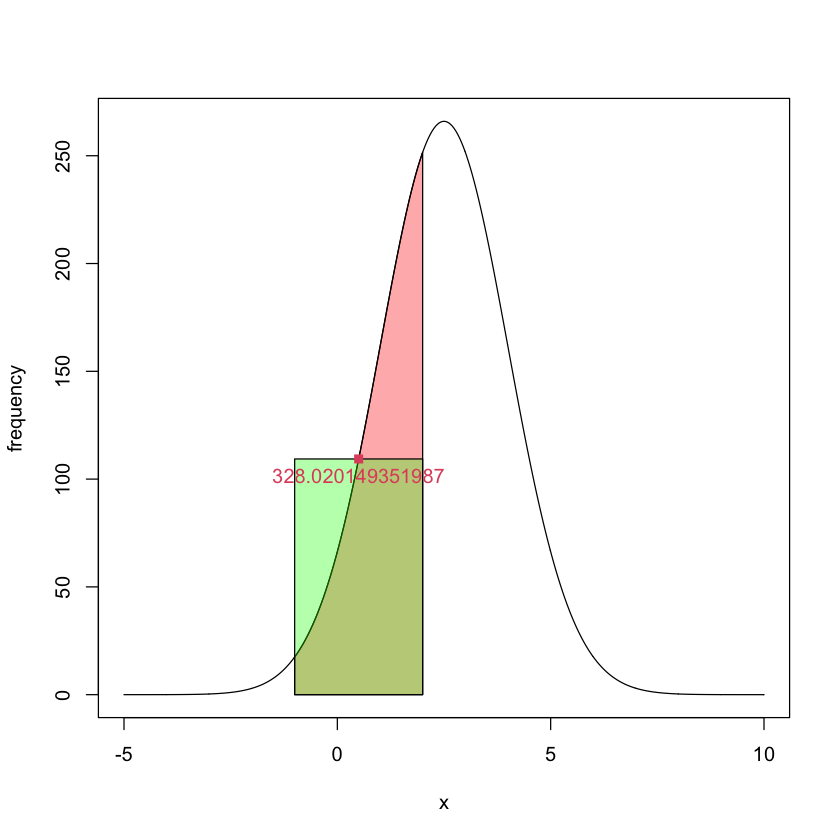

[1] 210.7861

[1] "probability between 1 and 2 = 0.210786086250307"


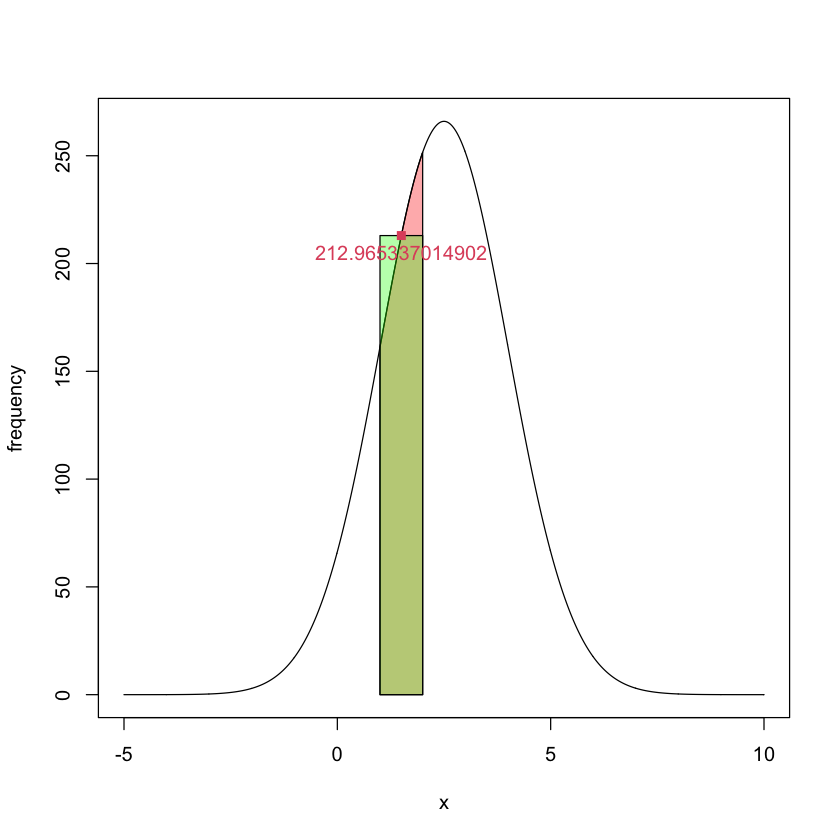

In [15]:
#(-1,2)
plot(x, 1000*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(-1,2,0.01)
polygon(c(-1,interval,2), c(0,1000*dnorm(interval, 2.5,1.5),0), col = "#FF000055")
polygon(c(-1,2,2,-1), 1000*c(dnorm(0.5, 2.5,1.5),dnorm(0.5, 2.5,1.5),0,0), col = "#00FF0055")
points(0.5,1000*dnorm(0.5,2.5,1.5),pch=15,col=2)
text(0.5,1000*dnorm(0.5,2.5,1.5),pch=15,col=2,labels =1000*3*dnorm(0.5,2.5,1.5), pos=1)
p5 <- pnorm(2, 2.5, 1.5) - pnorm(-1, 2.5, 1.5)
p5*1000
print(paste("probability between -1 and 2 =",p5))


#(1,2)
plot(x, 1000*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(1,2,0.01)
polygon(c(1,interval,2), c(0,1000*dnorm(interval, 2.5,1.5),0), col = "#FF000055")
polygon(c(1,2,2,1), 1000*c(dnorm(1.5, 2.5,1.5),dnorm(1.5, 2.5,1.5),0,0), col = "#00FF0055")
points(1.5,1000*dnorm(1.5,2.5,1.5),pch=15,col=2)
text(1.5,1000*dnorm(1.5,2.5,1.5),pch=15,col=2,labels =1000*dnorm(1.5,2.5,1.5), pos=1)
p6 <- pnorm(2, 2.5, 1.5) - pnorm(1, 2.5, 1.5)
p6*1000
print(paste("probability between 1 and 2 =",p6))


##### Question I:  <u>What are the 3 different arguments of these functions? How are they related to the Gaussian function?</u>

_dnorm(x, mean = 0, sd = 1, log = FALSE) dnorm gives the density  
pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE) pnorm gives the distribution function   
x, q: vector of quantiles;  
log, log.p: logical; if TRUE, probabilities p are given as log(p);  
lower.tail: logical; if TRUE (default), probabilities are 𝑃[𝑋≤𝑥] otherwise, 𝑃[𝑋>𝑥]._

##### Question II:  <u>What is the difference between the first argument of ```dnorm``` and ```rnorm```?</u>

_rnorm(n, mean = 0, sd = 1)  
n : number of observations. If length(n) > 1, the length is taken to be the number required.  
```exp:```Create a sample of 50 numbers which are normally distributed.  
y <- rnorm(50)_

##### Question III:  <u>How would you estimate the probability of having a number between 0.5 and 4 from the density distribution?</u>

_```3.5*dnorm(2.25,mean,sd)```_

##### Question IV:  <u>What is the probability to obtain the number 2?</u>

_0_

##### Question V:  <u>What is the difference between probability and frequency?</u>

_Probability is a mathematical object from the axiomatic theory of probability, it is a number from the (0; 1) interval.  
A frequency is a physical number of events from the real world per an interval of time._

##### Question VI:  <u>How would you calculate the area of the rectangle and the area under the curve in the figure given above?</u>

_```exp:```(-1,2)  
rectangle = ```1000*3*dnorm(0.5,2.5,1.5)```  
under curve = ```pnorm(2, 2.5, 1.5) - pnorm(-1, 2.5, 1.5)```_


### Exercise 2
We now check the behavior of the t-distribution which is an integral part of the t-test and the exponential function which describes many temporal processes in nature.

- Plot the density and cumulative probability distribution (```dt()``` and ```pt``` with argument ```df=3```) for a t-distribution with 3 degrees of freedom. Plot the normal distribution over it with ```lines()```. 
- Plot the density and cumulative probability distribution for an exponential distribution (```dexp()```) with a rate parameter equal to 1 (the default). Repeat with a rate parameter equal to 2. What happens when you do the plot on logarithmic (y-coordinate) and double-logarithmic scale?


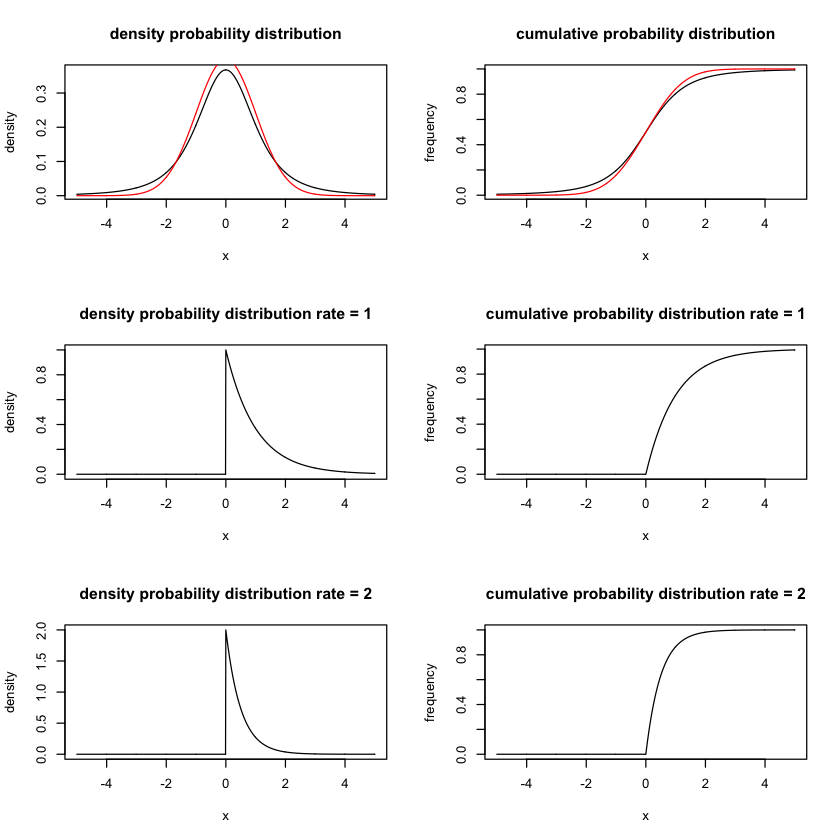

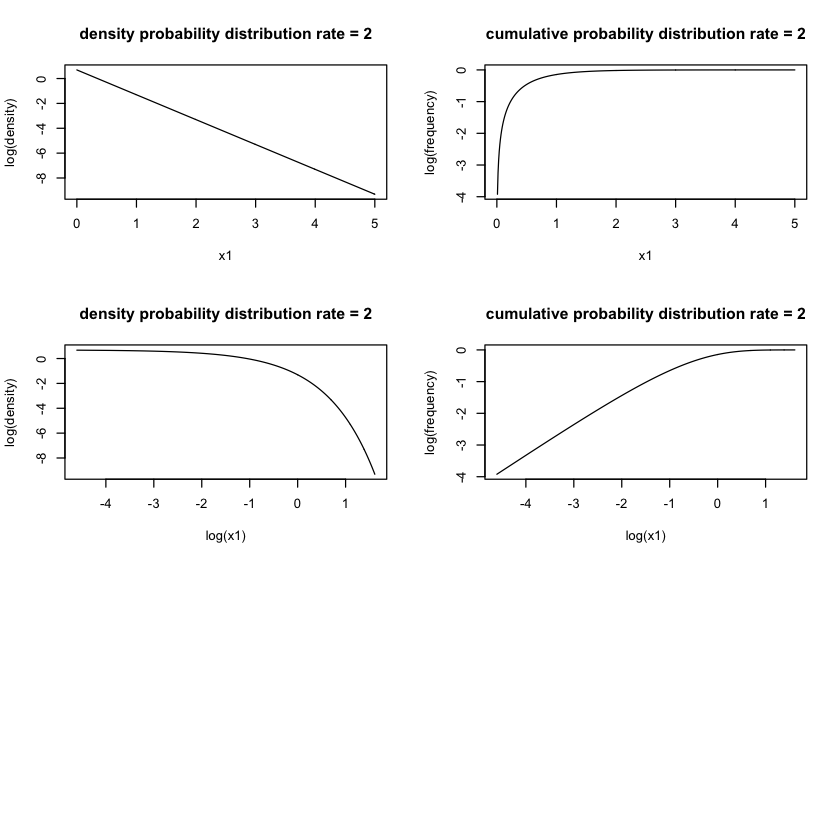

In [82]:
par(mfrow = c(3,2))
x <- seq(-5,5,0.01)

# density and cumulative function
dens_t <- dt(x, df=3)
cum_t <- pt(x,df=3)
# Plot the normal distribution over it with lines()
plot(x, dens_t, type="l", ylab="density", main="density probability distribution")
lines(x, dnorm(x), col="red")
plot(x, cum_t, type="l", ylab="frequency", main="cumulative probability distribution")
lines(x, pnorm(x), col="red")

#Plot the density and cumulative probability distribution
dens_exp <- dexp(x, rate = 1)
cum_exp <- pexp(x, rate = 1)
plot(x, dens_exp, type="l", ylab="density", main="density probability distribution rate = 1")
plot(x, cum_exp, type="l", ylab="frequency", main="cumulative probability distribution rate = 1")

#Repeat with a rate parameter equal to 2
dens_exp1 <- dexp(x, rate = 2)
cum_exp1 <- pexp(x, rate = 2)
plot(x, dens_exp1, type="l", ylab="density", main="density probability distribution rate = 2")
plot(x, cum_exp1, type="l", ylab="frequency", main="cumulative probability distribution rate = 2")

x1 <- seq(0,5,0.01)
dens_exp2 <- dexp(x1, rate = 2)
cum_exp2 <- pexp(x1, rate = 2)
# plot on logarithmic (y-coordinate)
plot(x1, log(dens_exp2), type="l", ylab="log(density)", main="density probability distribution rate = 2")
plot(x1, log(cum_exp2), type="l", ylab="log(frequency)", main="cumulative probability distribution rate = 2")

#plot on double-logarithmic scale
plot(log(x1), log(dens_exp2), type="l", ylab="log(density)", main="density probability distribution rate = 2")
plot(log(x1), log(cum_exp2), type="l", ylab="log(frequency)", main="cumulative probability distribution rate = 2")

##### Question I:  <u>What happens with the t-distribution of high degrees of freedom?</u>

_As the degree of freedom n increases, the t-distribution gets closer and closer to the standard normal distribution._

##### Question II:  <u>Which is a good visual way to check whether data is exponentially distributed?</u>

_Plot on logarithmic(y-coordinate). If they fall on a line, we can assume the data is exponentially distributed._


### Exercise 3
We now will generate random values and visualize them in multiple ways

Use the function ```rnorm()``` to draw a random sample of 25 values from a normal distribution with a mean of 0 and a standard deviation equal to 1.0. 

Use a histogram, with ```probability=TRUE``` to display the values. Overlay the histogram with:  
(a) an estimated density curve;  
(b) the theoretical density curve for a normal distribution with mean 0 and standard deviation equal to 1.0. 

Repeat with samples of 100, 500 and 1000 values, showing the different displays in different panels on the same graphics page (```par(mfrow=...)```)


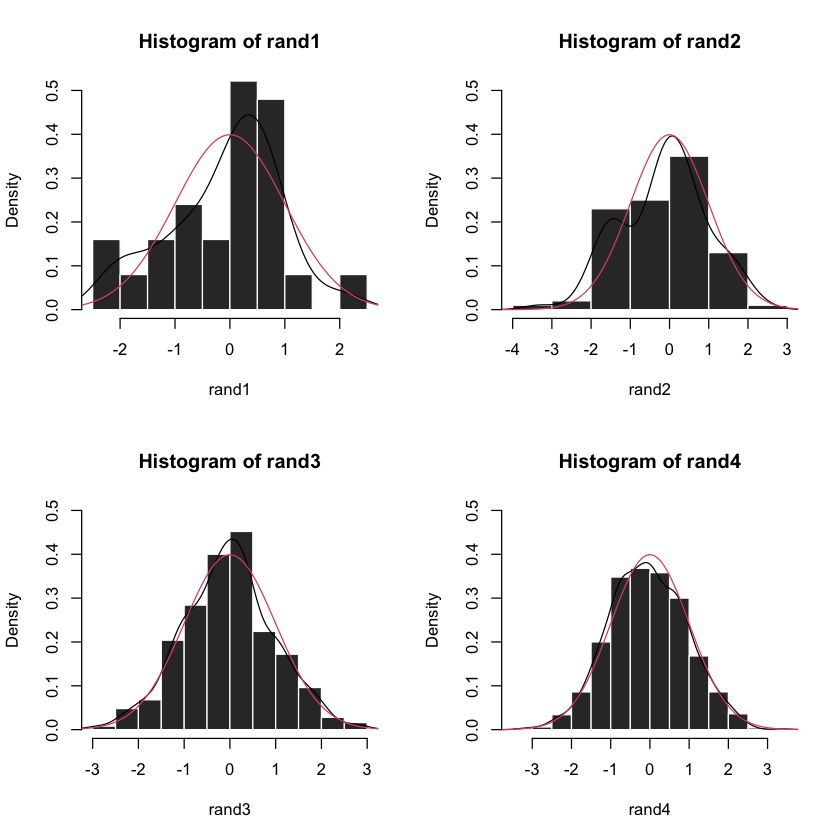

In [85]:
par(mfrow = c(2,2))
rand1 <- rnorm(25)
rand2 <- rnorm(100)
rand3 <- rnorm(500)
rand4 <- rnorm(1000)
x <- seq(-5,5,0.01)

hist(rand1, probability = TRUE,ylim=c(0,0.5), border="#FFFFFF", col="#333333")
lines(density(rand1))
lines(x, dnorm(x), col=2)

hist(rand2, probability = TRUE,ylim=c(0,0.5), border="#FFFFFF", col="#333333")
lines(density(rand2))
lines(x, dnorm(x), col=2)

hist(rand3, probability = TRUE,ylim=c(0,0.5), border="#FFFFFF", col="#333333")
lines(density(rand3))
lines(x, dnorm(x), col=2)

hist(rand4, probability = TRUE,ylim=c(0,0.5), border="#FFFFFF", col="#333333")
lines(density(rand4))
lines(x, dnorm(x), col=2)



##### Question I:  <u>What are the black and the red lines?</u>

_The black line is an estimated density curve, the red line is the theoretical density curve for a normal distribution with mean 0 and standard deviation equal to 1.0._

##### Question II:  <u>What improves when you increase the number of values?</u>

_The estimated curve get closer to the theoretical density curve._

##### Question III:  <u>What does ```#333333``` mean?</u>

_#333333 color RGB value is (51,51,51). This hex color code is also a web safe color which is equal to #333. #333333 color name is Gray20 color._

### Exercise 4
Data with a distribution close to lognormal are quite common. Size measurements of biological organisms often have this character. 

As an example, consider the measurements of body weight (```body```) in the data frame ```Animals``` (```MASS``` package). Begin by drawing a histogram of the untransformed values, and overlay a density curve. Then

- Draw an estimated density curve for the logarithms of the values. 
- Determine the mean and standard deviation of ```log(Animals$body)```. Overlay the estimated density with the theoretical density for a normal distribution with the mean and standard deviation just obtained.



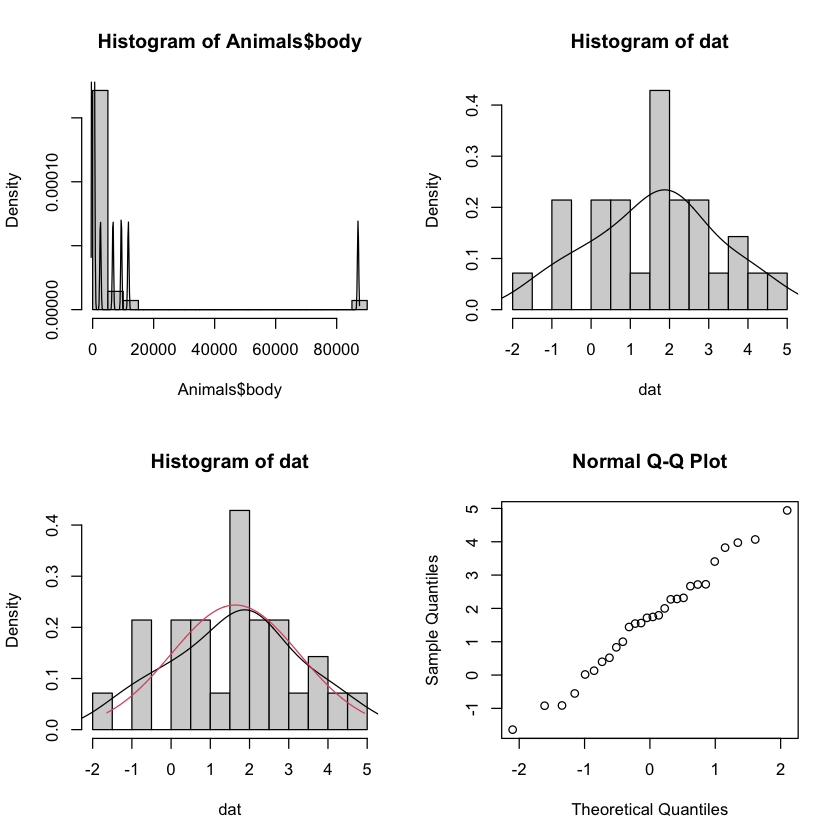

In [86]:
par(mfrow=c(2,2))
library(MASS)
data(Animals)

#drawing a histogram of the untransformed values.
hist(Animals$body,20, probability=T)
lines(density(Animals$body))

#Draw an estimated density curve for the logarithms of the values.
dat <- log10(Animals$body)
hist(dat,20, probability=T)
lines(density(dat))

hist(dat,20, probability=T)
lines(density(dat))
#Determine the mean and standard deviation of log(Animals$body).
x <- seq(min(dat),max(dat),0.01)
#Overlay the estimated density with the theoretical density for a normal distribution with the mean and standard deviation just obtained.
lines(x, dnorm(x,mean(dat),sd(dat)),col=2)

qqnorm(dat)


##### Question I:  <u>Does the distribution look like a normal distribution after transformation to a logarithmic scale?</u>

Difficult to determine with such a low number but it could be. The Q-Q plot is a good check for normality which is valid when the points form a straight line.

### Exercise 5
We will now compare different types of distributions and how they look for low and high sample size.

The following script plots an estimated density curve for a random sample of 50 values from a normal distribution:

- Plot estimated density curves (```plot(density(...))```) for random samples containing 50 values
  - the normal distribution
  - the uniform distribution (```runif(50)```)
  - the $t$-distribution with 3 degrees of freedom. 
-  Overlay the three plots and use different colors.
- Repeat the same but now taking random samples of 500 and 5000 values



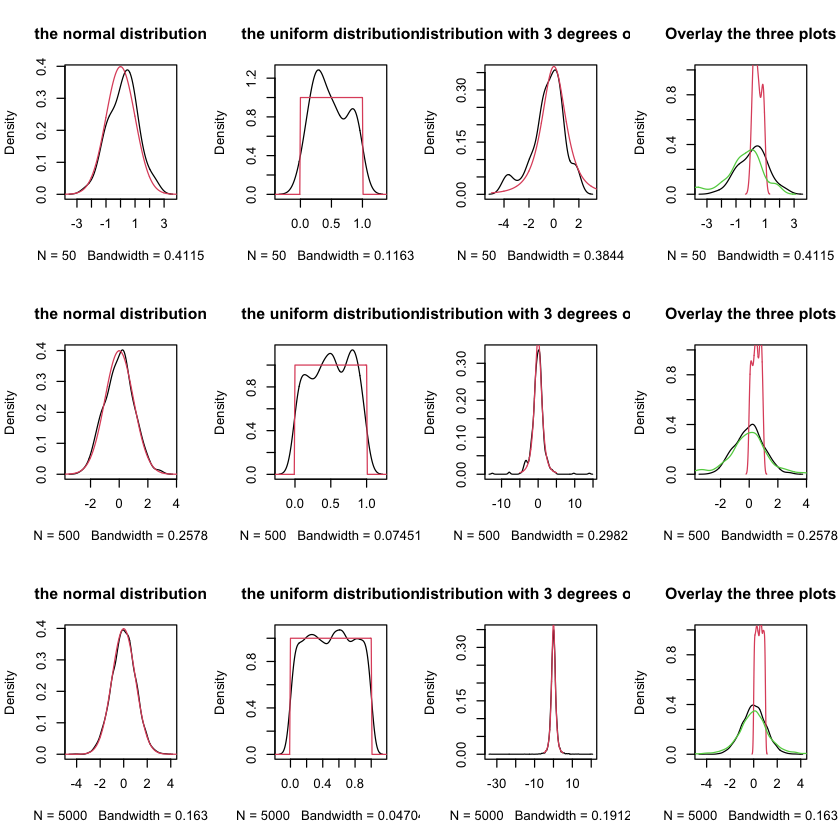

In [104]:
# a random sample of 50 values from a normal distribution:
par(mfrow = c(3,4))

rand1 <- rnorm(50)
x <- seq(-5,5,0.01)
plot(density(rand1),main="the normal distribution")
lines(x, dnorm(x), col=2)

rand2 <- runif(50)
plot(density(rand2),main="the uniform distribution")
lines(x, dunif(x), col=2)

rand3 <- rt(50, df=3)
plot(density(rand3),main="the t-distribution with 3 degrees of freedom")
lines(x, dt(x, df=3), col=2)

plot(density(rand1), ylim= c(0,1), col=1,main="Overlay the three plots")
lines(density(rand2), col=2)
lines(density(rand3), col=3)

# taking random samples of 500 
rand4 <- rnorm(500)
x <- seq(-5,5,0.01)
plot(density(rand4),main="the normal distribution")
lines(x, dnorm(x), col=2)

rand5 <- runif(500)
plot(density(rand5),main="the uniform distribution")
lines(x, dunif(x), col=2)

rand6 <- rt(500, df=3)
plot(density(rand6),main="the t-distribution with 3 degrees of freedom")
lines(x, dt(x, df=3), col=2)

plot(density(rand4), ylim= c(0,1), col=1,main="Overlay the three plots")
lines(density(rand5), col=2)
lines(density(rand6), col=3)

# taking random samples of 5000
rand7 <- rnorm(5000)
x <- seq(-5,5,0.01)
plot(density(rand7),main="the normal distribution")
lines(x, dnorm(x), col=2)

rand8 <- runif(5000)
plot(density(rand8),main="the uniform distribution")
lines(x, dunif(x), col=2)

rand9 <- rt(5000, df=3)
plot(density(rand9),main="the t-distribution with 3 degrees of freedom")
lines(x, dt(x, df=3), col=2)

plot(density(rand7), ylim= c(0,1), col=1,main="Overlay the three plots")
lines(density(rand8), col=2)
lines(density(rand9), col=3)

##### Question I:  <u>Why is the estimated density curve of the uniformely distiubuted values much higher?</u>

_the default distribution range of unif() is from 0 to 1, so they have a higher probabilities to get these values._

### Exercise 6

Small sample sizes with a low number of random (or measured) values are tricky to visualize as the values fluctuate a lot.

There are two ways to make the estimated density smoother:

- One is to increase the number of samples
- The other is to increase the bandwidth of ```density()```. For example
```
plot(density(rnorm(50), bw=0.2), type="l")
plot(density(rnorm(50), bw=0.6), type="l")
```

Repeat each of these with bandwidths of 0.15, with default choice of bandwidth, and with the bandwidth set to 0.75

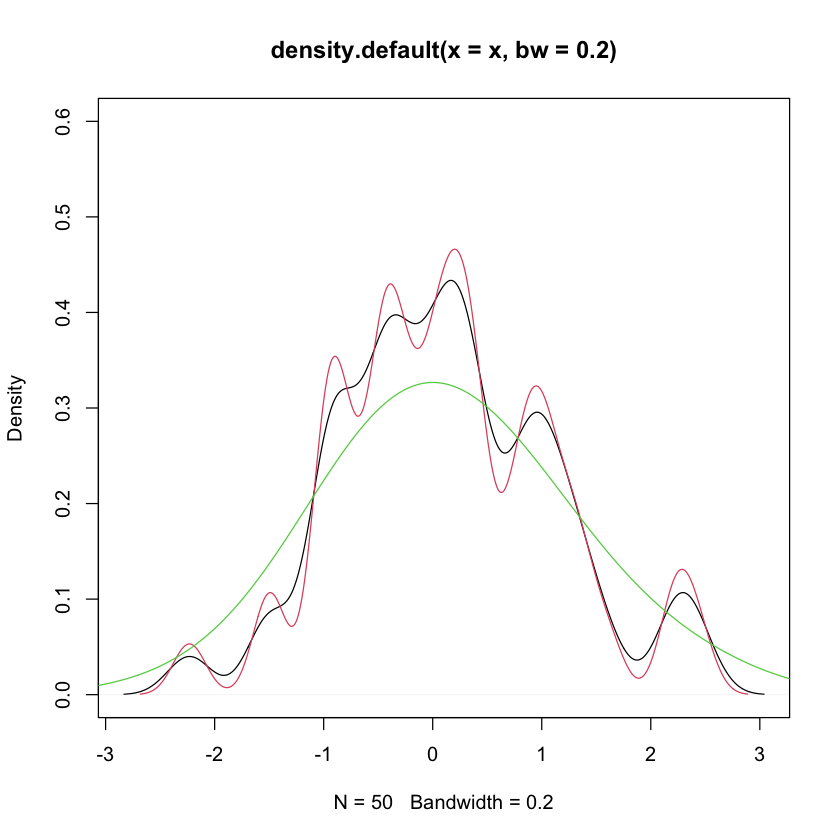

In [113]:
# make the estimated density smoother:
x<-rnorm(50)
plot(density(x, bw=0.2), type="l",ylim=c(0,0.6))
lines(density(x, bw=0.15), type="l",col=2)
lines(density(x, bw=0.75), type="l",col=3)

### Exercise 7
The density estimation has the issue that it depends strongly on bandwidth and choice of kernel, making it sometimes not very useful to judge normality. A much better tool is the quantile-quantile plot. Try the following script and assess how the plot characterizes normally distributed data.
- See how the plot deviates when comparing the normal distribution with random variables from other distributions.
- Increase the number of data points
- Substitute the ```rnorm()``` function by random variables from other distributions (e.g. ```rexp()``` and ```rlnorm()```)


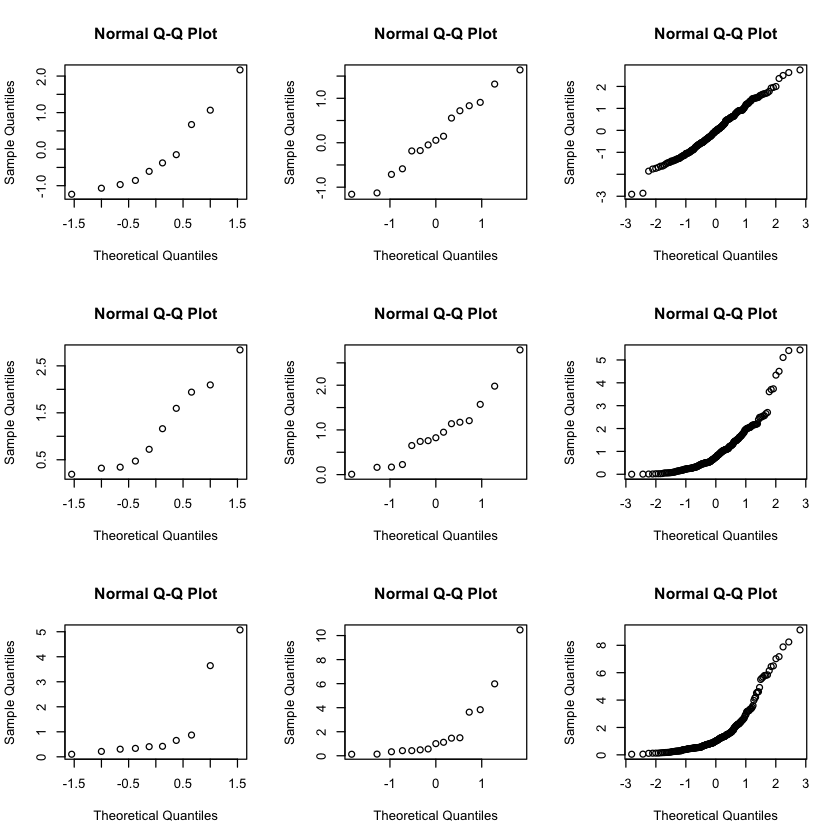

In [117]:
par(mfrow = c(3,3))
qqnorm(rnorm(10))
qqnorm(rnorm(15))
qqnorm(rnorm(200))

qqnorm(rexp(10))
qqnorm(rexp(15))
qqnorm(rexp(200))

qqnorm(rlnorm(10))
qqnorm(rlnorm(15))
qqnorm(rlnorm(200))

##### Question I:  <u>How does the ```qqnorm()``` function show that the data is normally distributed?</u>

_The data will show a linear relationship in qqnorm() function plot if it is normally distributed._

##### Question II:  <u>Which is the limiting function when increasing the number of values to infinity?</u>

_y=ax+b_

##### Question III:  <u>How do the other tested distributions show their difference to a normal distribution when using the ```qqnorm()``` function?</u>

_They don't show a linear realtionship in QQ plot, they are more or less skewed._


### Exercise 8
We now will assess 2 experimental data sets for their normality.

Take the data sets ```lh``` and ```Animals``` and check for normality using ```qqnorm```. Do the same on their logarithmic values. Additionally, use ```boxplot()``` to get an idea about how the boxplot of a normal distribution looks.


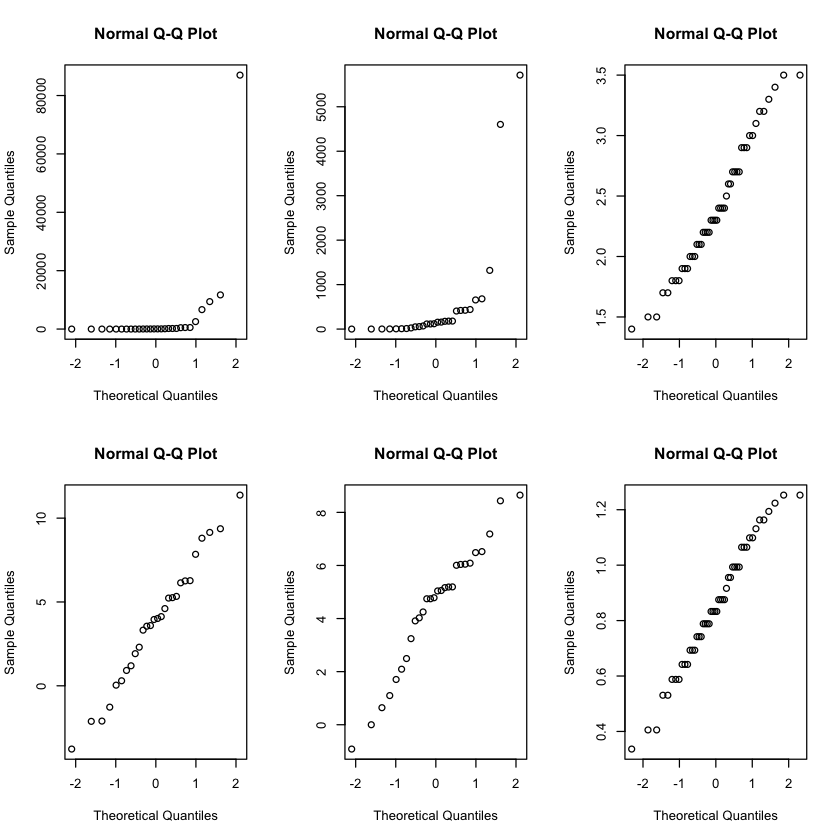

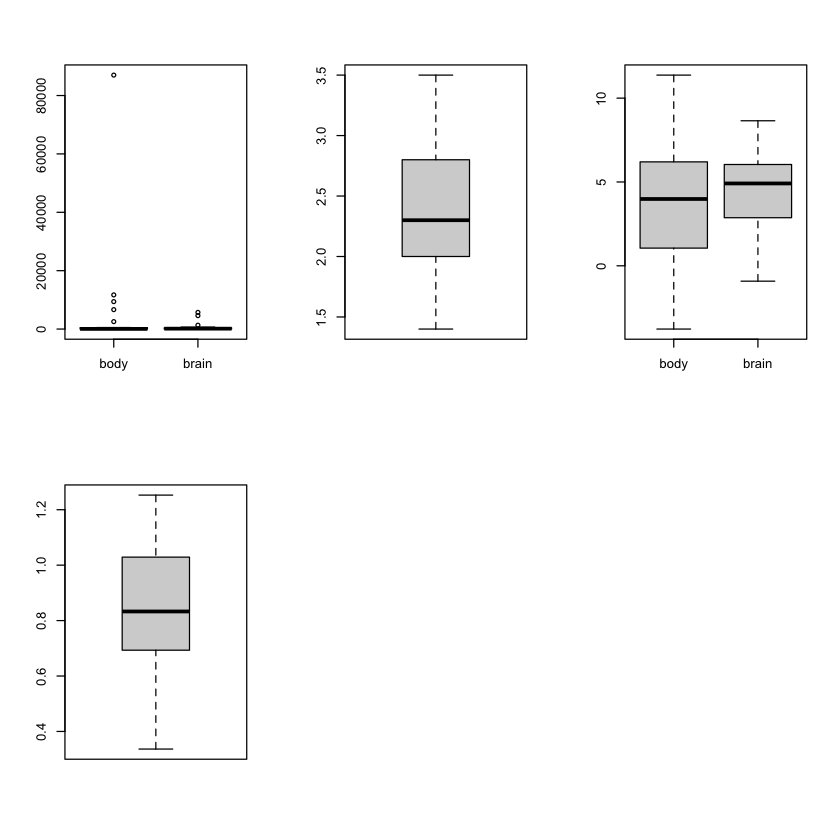

In [142]:
par(mfrow = c(2,3))
library(MASS)
data(Animals)
data(lh)

qqnorm(Animals$body)
qqnorm(Animals$brain)
qqnorm(lh)

qqnorm(log(Animals$body))
qqnorm(log(Animals$brain))
qqnorm(log(lh))

boxplot(Animals)
boxplot(lh)

boxplot(log(Animals))
boxplot(log(lh))

##### Question I:  <u>Which data set is (approximately) normally distributed?</u>

_lh_

##### Question II:  <u>Which data set is (approximately) log-normally distributed?</u>

_lh and Animals_

### Exercise 9
Here, we will calculate the limit distribution of the means of sets of random variables. Note that the mean corresponds to the sum divided by the number of variables, and therefore the central limit theorem applies. 

First take a random sample from the normal distribution, and plot the estimated density function

Then, take the repeated samples of size 4, calculate the mean for each such sample, and plot the density function for the distribution of means:
Additionally, use ```qqnorm()``` to estimate normality.

Repeat this code, using different sample sizes (e.g. 9 and 25) and numbers of averages larger than 100.


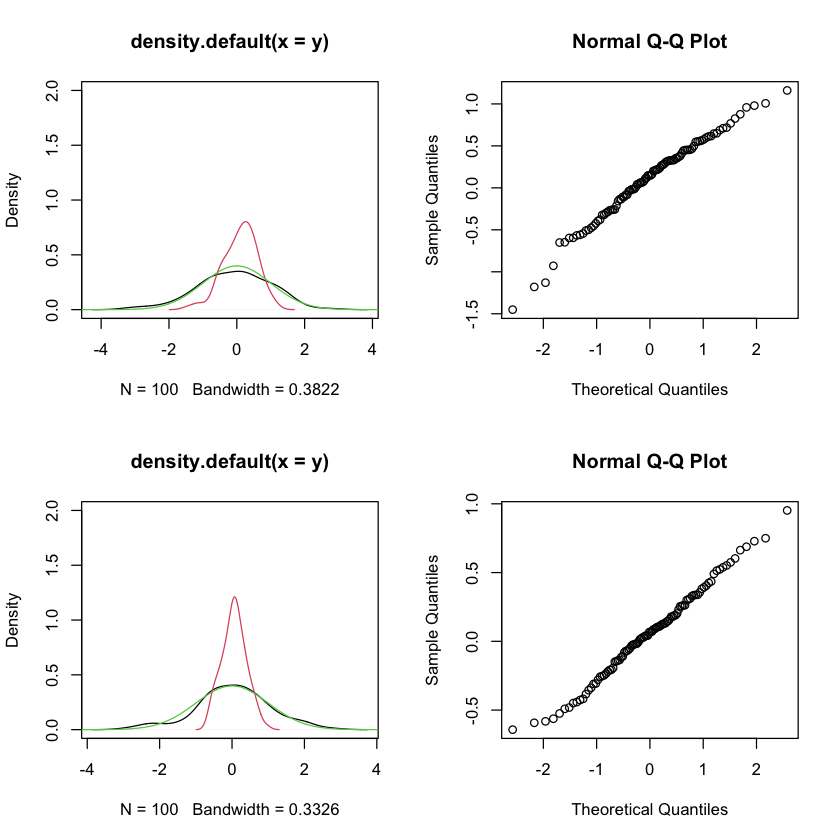

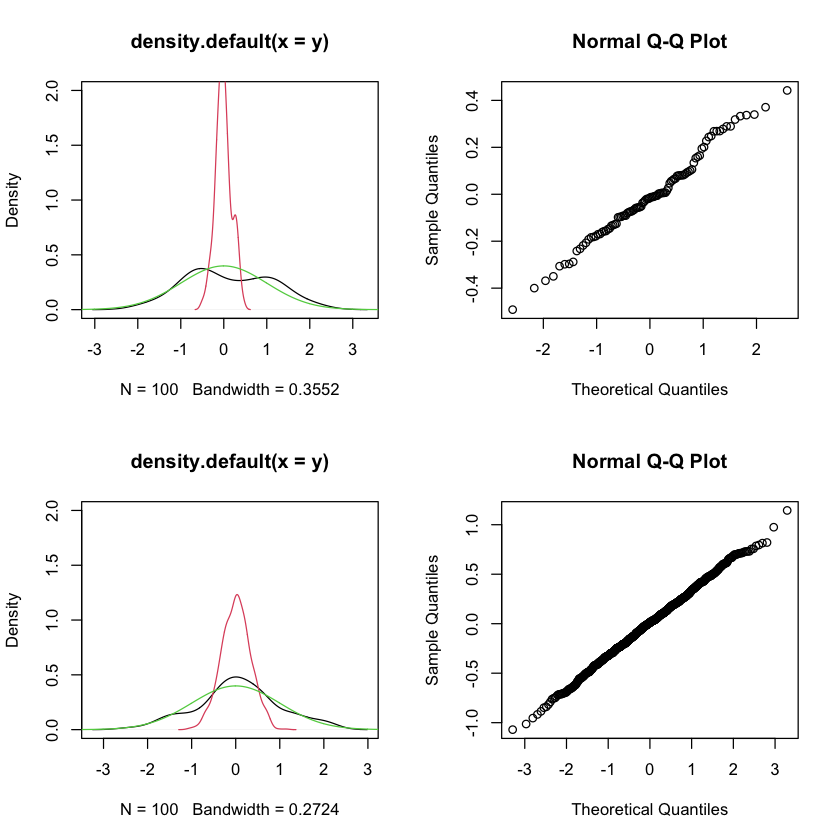

In [179]:
par(mfrow = c(2,2))
x <- seq(-5,5,0.01)
y <- rnorm(100)
plot(density(y), type="l",ylim=c(0,2))
av <- numeric(100)
for (i in 1:100) {
  av[i] <- mean(rnorm(4))
}
lines(density(av), col=2)
lines(x,dnorm(x),col=3)
qqnorm(av)

#sample sizes = 9, numbers of averages = 100
y <- rnorm(100)
plot(density(y), type="l",ylim=c(0,2))
av <- numeric(100)
for (i in 1:100) {
  av[i] <- mean(rnorm(9))
}
lines(density(av), col=2)
lines(x,dnorm(x),col=3)
qqnorm(av)

#sample sizes = 25, numbers of averages = 100
y <- rnorm(100)
plot(density(y), type="l",ylim=c(0,2))
av <- numeric(100)
for (i in 1:100) {
  av[i] <- mean(rnorm(25))
}
lines(density(av), col=2)
lines(x,dnorm(x),col=3)
qqnorm(av)

#sample sizes = 9, numbers of averages = 1000
y <- rnorm(100)
plot(density(y), type="l",ylim=c(0,2))
av <- numeric(1000)
for (i in 1:1000) {
  av[i] <- mean(rnorm(9))
}
lines(density(av), col=2)
lines(x,dnorm(x),col=3)
qqnorm(av)

##### Question I:  <u>Why is the red distribution more narrow than the black one?</u>

_Accroding to the additivity of independent normal distributions, the bigger n is, the `sd` should be smaller.  
If $ X ∼ N(μ,σ^2)$ ，then $\overline{X} ∼ N(μ,\frac{σ^2}{n})$._

##### Question II:  <u>What happens when increasing the sample size?</u>

_The distribution become more narrow, e.g. having a standard deviation of $\sqrt{\frac{1}{25}}$=0.2 in the of sample size 25._

##### Question III:  <u>What happens when increasing the number of averages?</u>

_When n increases, the normalized distribution is close to the standard normal distribution._

### Exercise 10
In Exercise 9, we calculated the mean of normally distributed variables. But the central limit theorem applies for almost arbitrary distributions. Show this by calculating the mean distribution of $n$ uniformly distributed variables (```runif(n)```), log-normally distributed ones (```rlnorm(n)```) and exponentially distributed ones (```rexp(n,rate=1)```) by changing the script in Exercise 9 accordingly.


[1] "uniformly distributed standard deviation: 0.142265420113746"

[1] "Standard deviation: 0.968686329247394"

[1] "Standard deviation: 0.500247765655691"

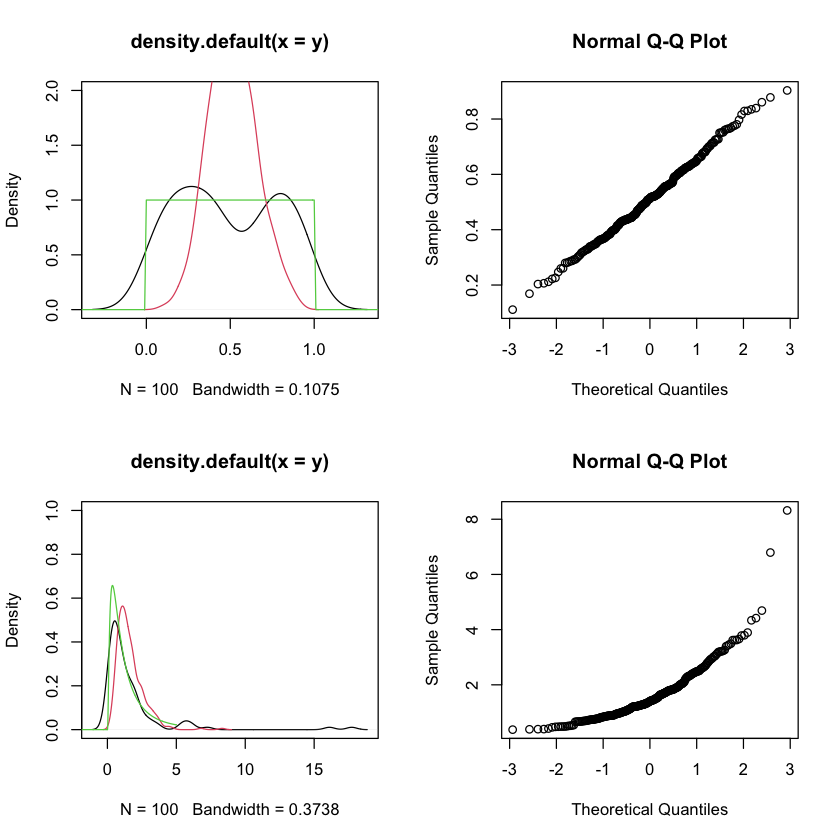

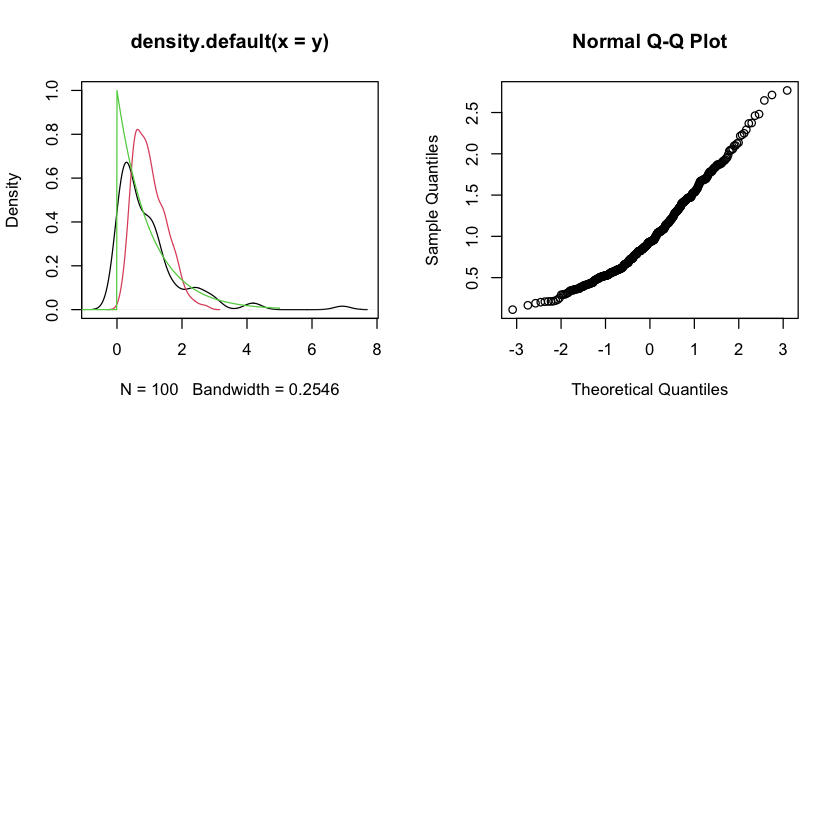

In [236]:
par(mfrow=c(2,2))
x <- seq(-5,5,0.01)

# the mean distribution of n uniformly distributed variables 
y <- runif(100)
plot(density(y), type="l",ylim=c(0,2))
av <- numeric(300)
for (i in 1:300) {
  av[i] <- mean(runif(4))
}
lines(density(av), col=2)
lines(x,dunif(x),col=3)
qqnorm(av)
paste("uniformly distributed standard deviation:",sd(av))

# the mean distribution of log-normally distributed
y <- rlnorm(100)
plot(density(y), type="l",ylim=c(0,1))
av <- numeric(300)
for (i in 1:300) {
  av[i] <- mean(rlnorm(4))
}
lines(density(av), col=2)
lines(x,dlnorm(x),col=3)
qqnorm(av)
paste("Standard deviation:",sd(av))

# the mean distribution of exponentially distributed 
y <- rexp(100,rate=1)
plot(density(y), type="l",ylim=c(0,1))
av <- numeric(500)
for (i in 1:500) {
  av[i] <- mean(rexp(4))
}
lines(density(av), col=2)
lines(x,dexp(x),col=3)
qqnorm(av)
paste("Standard deviation:",sd(av))

##### Question I:  <u>How much do you need to increase the number of samples and averages to reach a descent normal distribution (give the numbers for each type of distribution separately)?</u>

_uniformly distributed: 300  
log-normally distributed: 300  
exponentially distributed: 500_

### Exercise 11
Instead of taking the values from a theoretical probability density function, 
it is also possible to take random samples, usually with replacement, from a vector of values that originates from an empirical distribution. This is the bootstrap concept. Again, it may of interest to study the sampling distributions of means of different sizes. Consider the distribution of heights of female Adelaide University students, in the data frame ```survey``` (_MASS_ package). The script below takes 1000 bootstrap samples of size 4, calculating the mean for each such sample.

Repeat the procedure, taking samples of size 9 and 16. In each case use a density plot and ```qqnorm()``` to display the (empirical) sampling distribution.


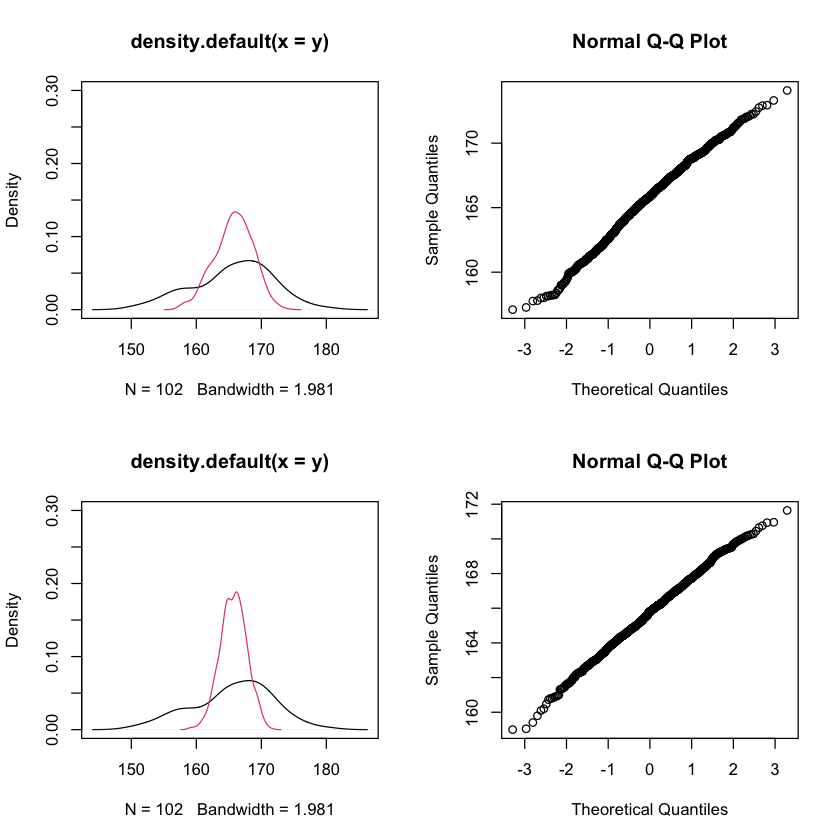

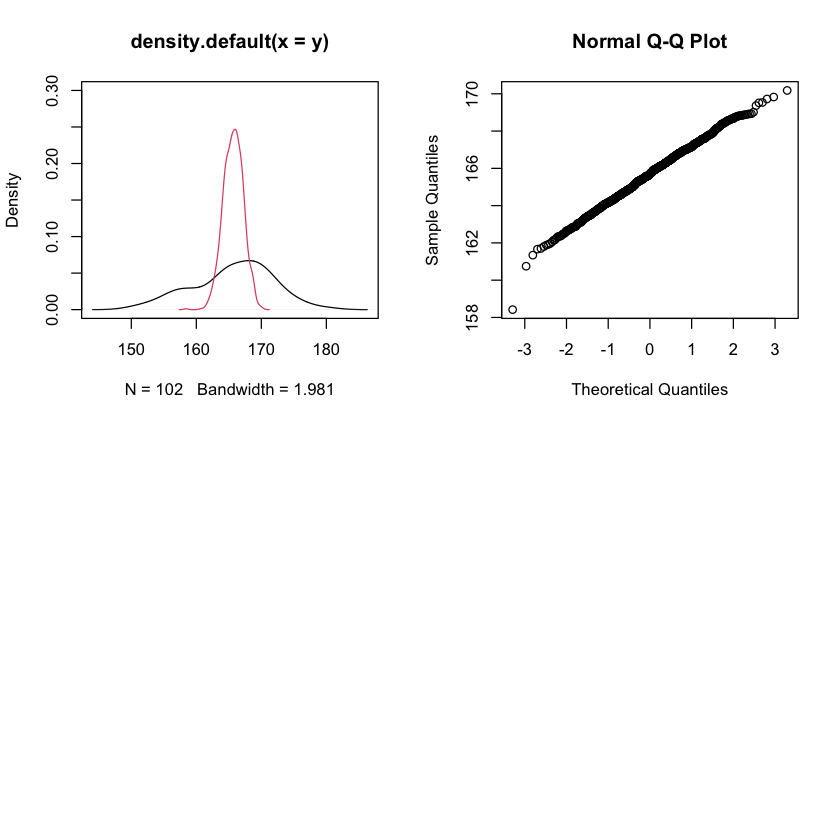

In [245]:
par(mfrow=c(2,2))
library(MASS)
y <- na.omit(survey[survey$Sex == "Female", "Height"])
av <- numeric(1000)
for (i in 1:1000)
  av[i] <- mean(sample(y, 4, replace=T))
plot(density(y), type="l",ylim=c(0,0.3))
lines(density(av), col=2)
qqnorm(av)

av <- numeric(1000)
for (i in 1:1000)
  av[i] <- mean(sample(y, 9, replace=T))
plot(density(y), type="l",ylim=c(0,0.3))
lines(density(av), col=2)
qqnorm(av)

av <- numeric(1000)
for (i in 1:1000)
  av[i] <- mean(sample(y, 16, replace=T))
plot(density(y), type="l",ylim=c(0,0.3))
lines(density(av), col=2)
qqnorm(av)

##### Question I:  <u>What do you observe?</u>

_The distribution become more narrow._


### Exercise 12
Generate random numbers from a normal distribution with a sequential dependence. The central limit theorem does not apply for variables with strong dependency. So how do we test for this dependency?

Try to understand the definition of y. The autocorrelation function (```acf()``` in R) calculates the dependence within a series (see also http://en.wikipedia.org/wiki/Autocorrelation). Apply this function on both data sets and check whether there is a consistent pattern for the correlated data set. Vary number of data points and repeat the experiment several times to get feeling of how a autocorrelation function can look like. 



Call:
ar(x = tsx)

Coefficients:
     1  
0.9879  

Order selected 1  sigma^2 estimated as  1.168

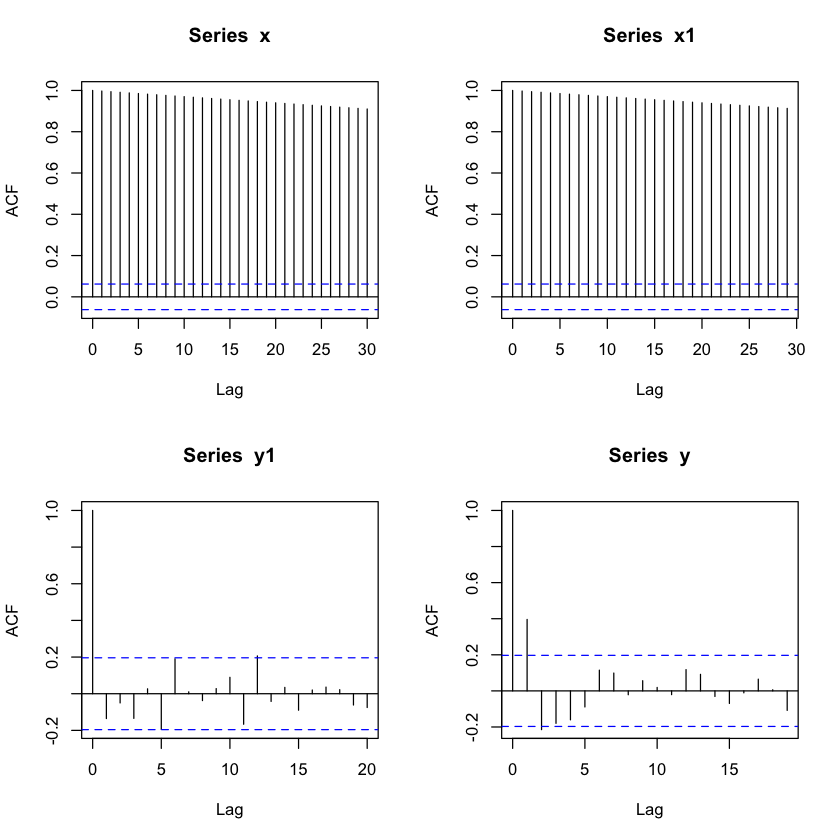

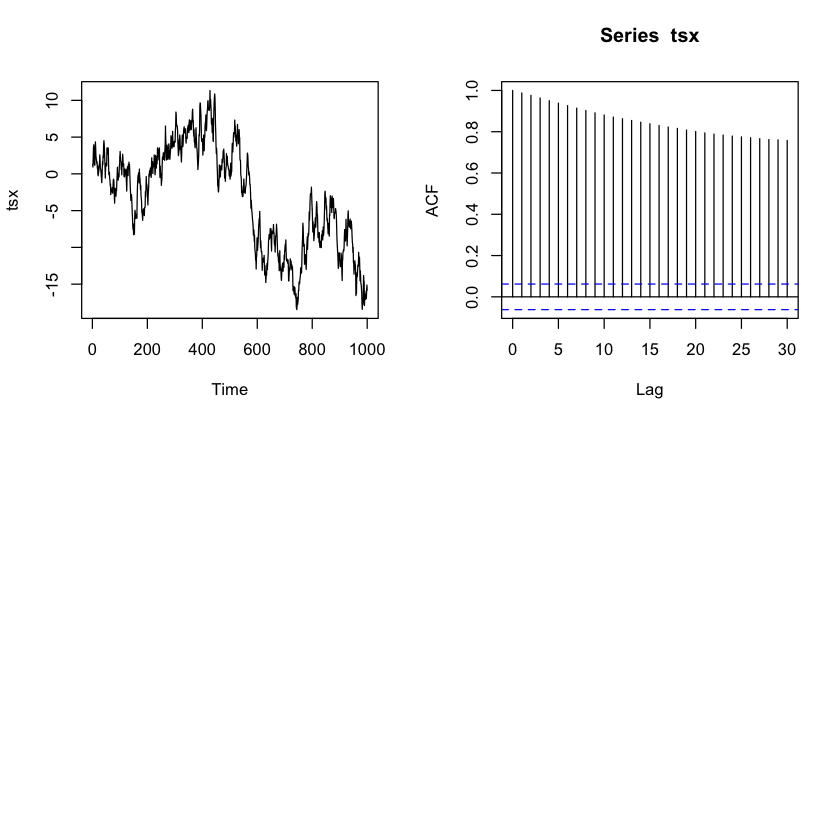

In [276]:
par(mfrow=c(2,2))
x<-c(1:1000)
x1<-x[-1]+x[-1000]
acf(x)
acf(x1)

y1<- rnorm(100)
y <- y1[-1] + y1[-100]
acf(y1)
acf(y)

set.seed(0)
x<-w<-rnorm(1000)       
for(t in 2:1000) 
    x[t]<-x[t-1]+w[t]
tsx<-ts(x)
plot(tsx)
acf(tsx)
a<-ar(tsx);a   

##### Question I:  <u>What is the main difference when introducing the above correlation?</u>

_The autocorrelation function reflects the correlation between the values of the same sequence in different time series._

### Exercise 13
We will now visually check whether we can still observe a normal distribution as limiting distribution.

See below the function that calculates the correlated data set of Exercise 12. The input of the function is the number of data points with a default value of 51. 

Create a ```for``` loop that calculates the sum and the mean of the correlated data set 1000 times. Check whether the sum and the mean are normally distributed. 


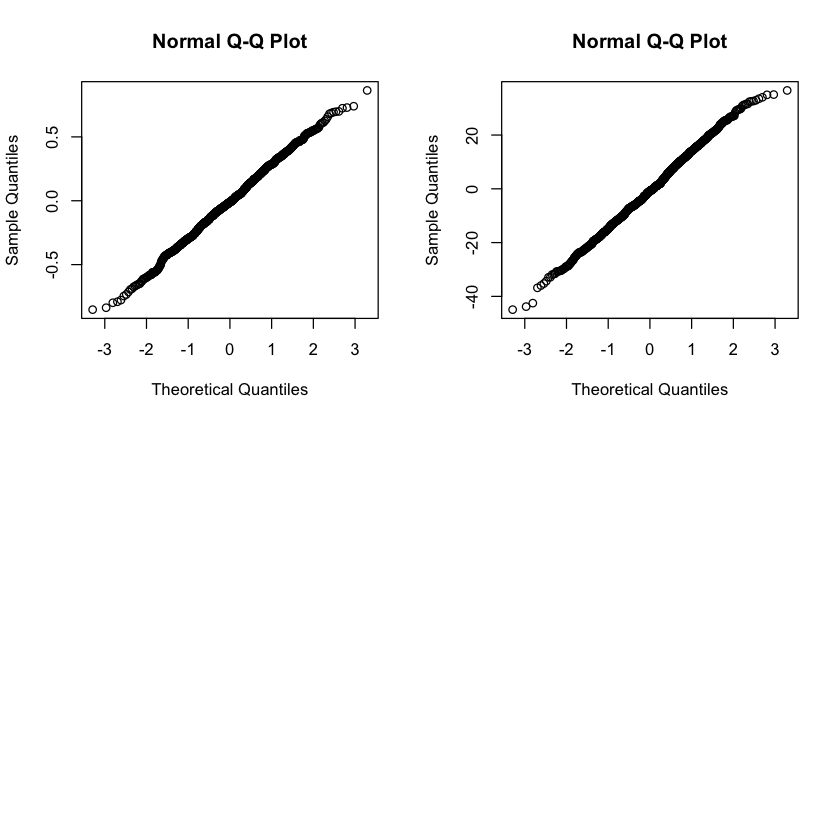

In [278]:
par(mfrow=c(2,2))
corrdat <- function(i=51) {
  y1 <- rnorm(i)
  y <- y1[-1] + y1[-i]
  return(y)
}
means <- sums <- vector(,1000)
for (j in 1:1000) {
    means[j] <- mean(corrdat())
    sums[j] <- sum(corrdat())    
}
qqnorm(means)
qqnorm(sums)

##### Question I:  <u>What do the results suggest??</u>

_the averages and sums are still normally distributed._

### Exercise 14
This is a simple example of how to compare a theoretical distribution with an observed one.

Take the given artificial count data for e.g. the number of tumors in 7 rats suffering from a certain type of cancer.

Enter the data and compute mean and variance. In order to check whether a Poisson model would be appropriate, calculate seven random values for the corresponding Poisson distribution (```lambda=78.3```). Take their mean and variance and compare them to the artificial data.
Calculate the distribution of mean and variance, plot their histograms and check whether mean and variance from the artificial data are within the main core of the distributions. 


[1] 78.28571

[1] 159.9048

[1] 77

[1] 45.66667

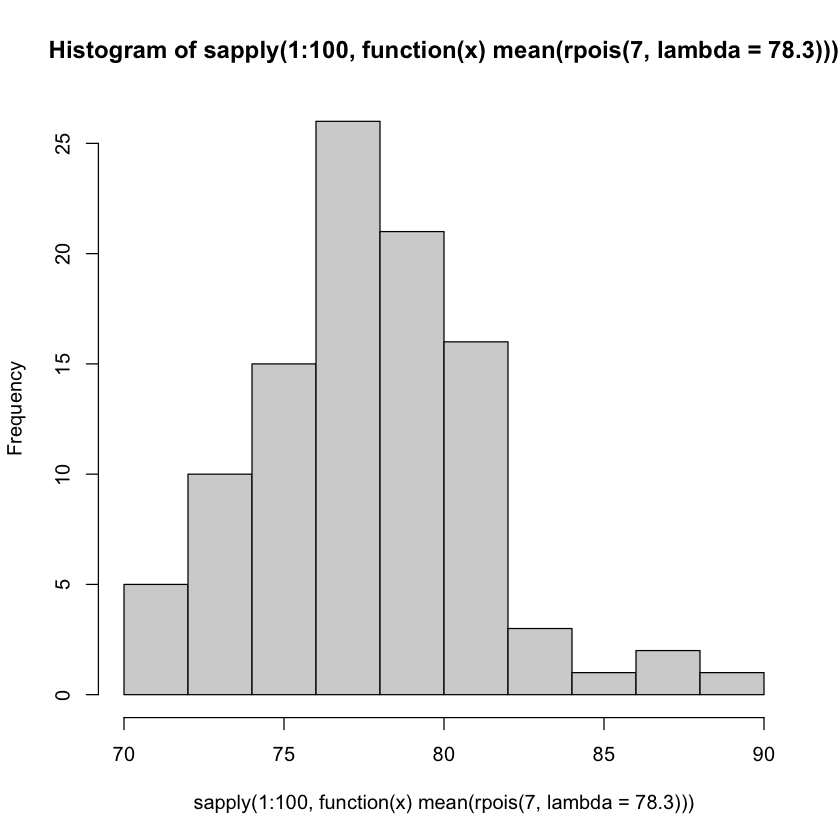

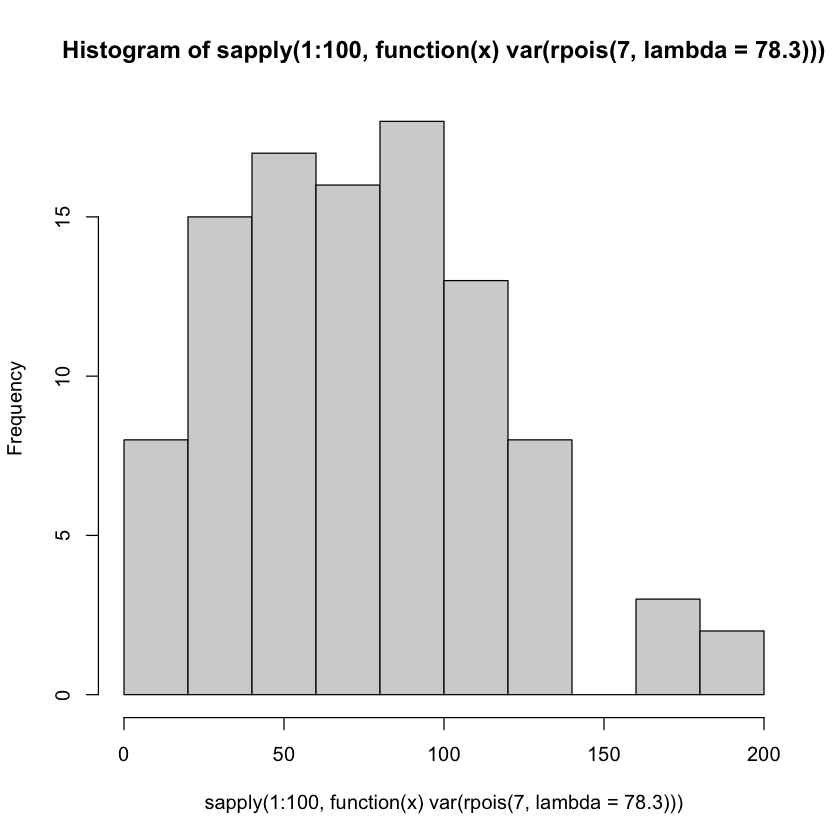

In [286]:
dat <- c(87, 53, 72, 90, 78, 85, 83)
rdat <- rpois(7, lambda=78.3)
mean(dat)
var(dat)
mean(rdat)
var(rdat)

hist(sapply(1:100, function(x) mean(rpois(7,lambda=78.3))))
hist(sapply(1:100, function(x) var(rpois(7,lambda=78.3))))

##### Question I:  <u>How well does the Poisson model fit the data?</u>

_the mean of 78.3 corresponds well, the variance of 160 is unlikely in the distribution of the variance._